In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
sns.set_style('whitegrid')

# Read data

In [2]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')

In [3]:
data1.head()

,Gene,2Me-C24,2Me-C26,2Me-C28
0,GI20343,1.346744,2.496608,1.463480
1,GI20343,1.775602,3.321113,2.007517
2,GI20343,2.145769,4.032710,2.505147
3,GI20344,1.294275,2.684514,1.866539
4,GI20344,1.306053,2.626536,1.970385


In [4]:
data2.head()

,Gene,C21,C22,C23,C24,C25,C27,C29,C31
0,GI20343,2.316037,3.221617,14.141607,2.051265,1.704792,0.639167,0.0,0.0
1,GI20343,1.606132,2.376064,11.134285,0.516397,1.486632,0.653211,0.0,0.0
2,GI20343,1.637710,2.327143,10.121149,1.522632,1.238527,0.594358,0.0,0.0
3,GI20344,1.320530,3.460702,14.254342,1.039662,1.954967,0.924800,0.0,0.0
4,GI20344,0.871533,2.262652,10.710961,0.831019,1.524022,0.703428,0.0,0.0


# Bar plots

## Use seaborn to plot. First we need to reshape the data into a stacked format

In [5]:
data1_stack = pd.melt(data1,id_vars='Gene', 
              value_vars=list(data1.columns[1:]),
              var_name='Chemicals', 
              value_name='Value')

data1_stack = data1_stack.sort_values(['Gene'])

In [6]:
data1_stack.head()

,Gene,Chemicals,Value
65,CG17821,2Me-C28,1.772124
43,CG17821,2Me-C26,2.424291
42,CG17821,2Me-C26,3.380547
64,CG17821,2Me-C28,1.465577
21,CG17821,2Me-C24,1.092600


In [7]:
data2_stack = pd.melt(data2,id_vars='Gene', 
              value_vars=list(data2.columns[1:]),
              var_name='Chemicals', 
              value_name='Value')

data2_stack = data2_stack.sort_values(['Gene'])

In [8]:
data2_stack.head()

,Gene,Chemicals,Value
87,CG17821,C24,1.670595
153,CG17821,C29,0.000000
152,CG17821,C29,0.000000
131,CG17821,C27,0.825590
130,CG17821,C27,0.467479


## Plot

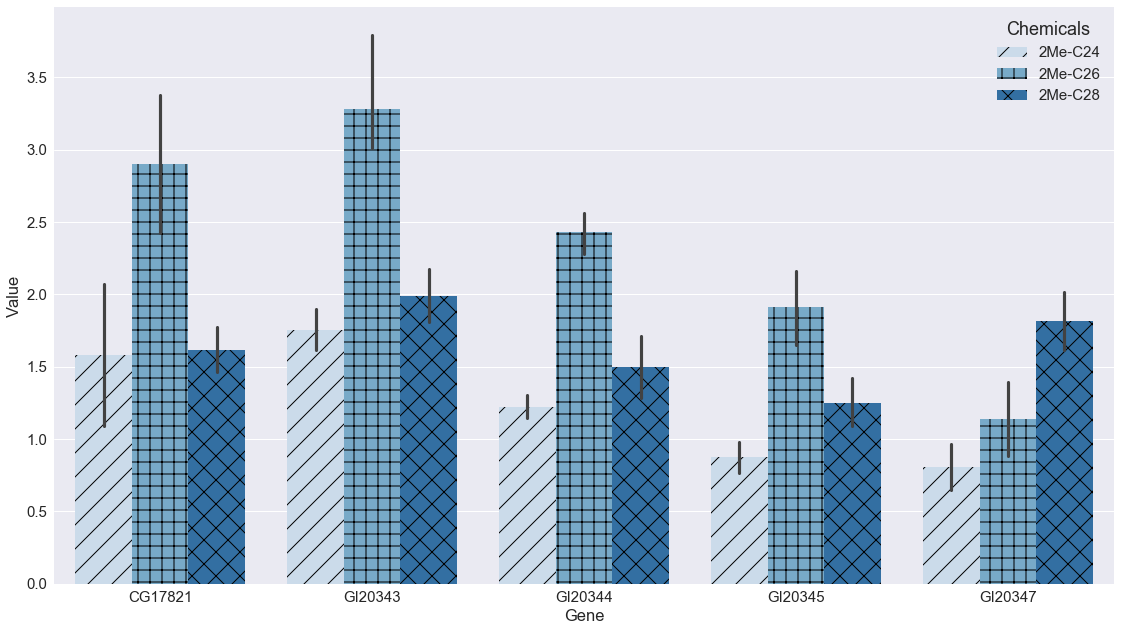

In [27]:
#plt.style.use('fivethirtyeight') # If you want different plot style
fig1 = plt.figure(figsize=(16,9))
fig1.subplots_adjust(hspace=0.15,
                     top=0.96,
                     left=0.05, 
                     right=0.97,
                     bottom=0.07)
sns.set(font_scale=1.5)
fig1 = sns.barplot(x="Gene", 
                   y="Value", 
                   hue="Chemicals", 
                   data=data1_stack, 
                   palette="Blues", 
                   hue_order=['2Me-C24','2Me-C26','2Me-C28'],
                   ci=68) # Standard deviation level 

# Because my friends' advisor is color blindness, I added the patterns to the bars to help him distinguish them.
num_locations = len(data1_stack.Gene.unique())
hatches = itertools.cycle(['/', '+', 'x', '-', '\\', '*', 'o','//', 'O', '.'])
for i, bar in enumerate(fig1.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
fig1.legend(loc='upper right', ncol=1, fancybox=True, shadow=True, title = 'Chemicals')


# If you want a violin plot, use the one below.

"""
fig1 = sns.violinplot(x="Gene", 
                      y="Value", 
                      hue="Chemicals", 
                      dodge=True,
                      palette="Set2",
                      data=data1_stack, 
                      scale="count",
                      hue_order=['2Me-C24','2Me-C26','2Me-C28'])
"""
plt.savefig('Gene1.pdf')

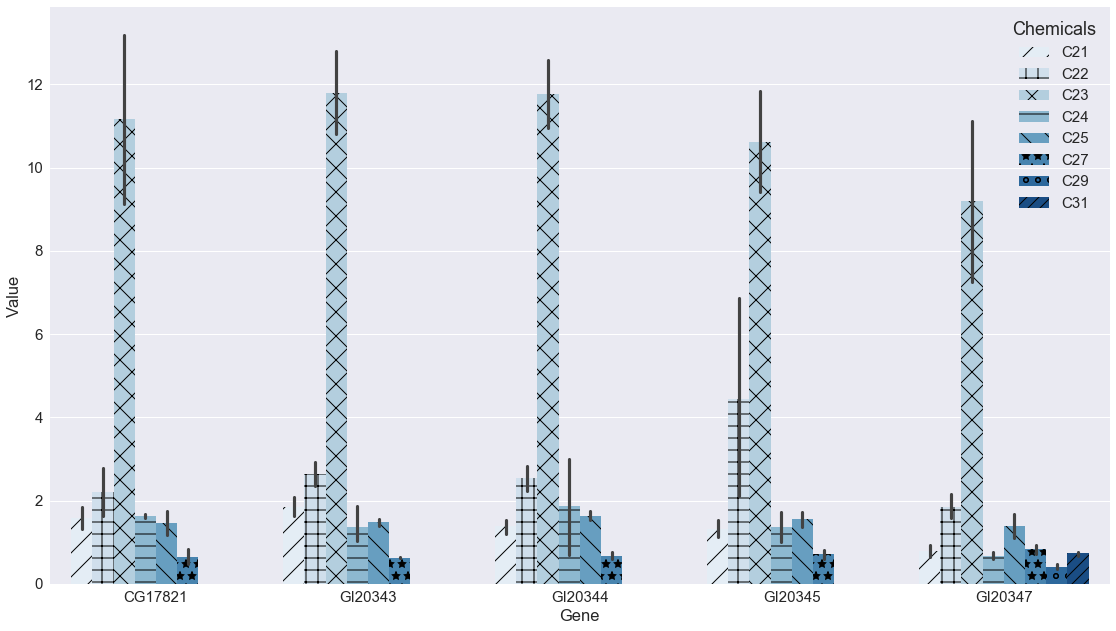

In [26]:
fig2 = plt.figure(figsize=(16,9))
fig2.subplots_adjust(hspace=0.15,
                     top=0.96,
                     left=0.05, 
                     right=0.97,
                     bottom=0.07)

fig2 = sns.barplot(x="Gene", 
                   y="Value", 
                   hue="Chemicals", 
                   data=data2_stack, 
                   palette="Blues", 
                   hue_order=['C21','C22','C23','C24','C25','C27','C29','C31'], 
                   ci=68)

num_locations = len(data2_stack.Gene.unique())
hatches = itertools.cycle(['/', '+', 'x', '-', '\\', '*', 'o','//', 'O', '.'])
for i, bar in enumerate(fig2.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
fig2.legend(loc='upper right', ncol=1, fancybox=True, shadow=True, title = 'Chemicals')

# If you want a violin plot, use the one below. Violin plot looks very bad when you have many hue levels.
"""
fig2 = sns.violinplot(x="Gene", 
                      y="Value",
                      hue="Chemicals", 
                      dodge=True, 
                      sacle="count", 
                      data=data2_stack, 
                      hue_order=['C21','C22','C23','C24','C25','C27','C29','C31'])
"""

plt.savefig('Gene2.pdf')